# Visualizações

Aqui são feitas visualizações mais aprofundadas dos dados pré-processados

In [1]:
# Se necessário
%pip install wordcloud
%pip install stanza

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [3]:
from python_scripts.save_load import load_df_from_bucket
from python_scripts.plots import plot_word_counts, plot_cloud
from python_scripts.processing import evaluate_words_lemmas
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset 1: Fake.br-Corpus

In [4]:
df = load_df_from_bucket('dados_processados.csv', tipo='processado')

# Corrigir words e lemmas de volta para listas em vez de strings
df[['words', 'lemmas']] = df.apply(evaluate_words_lemmas, axis=1, result_type='expand')

df.head()

KeyError: 'words'

### Verificar presença de nulos

O dataset original não possui valores nulos (constituído apenas da notícia e se é falsa ou não). Contudo, no notebook preprocessing.ipynb, foram introduzidas novas features, calculadas a partir do texto. Uma rápida verificação é realizada para assegurar que não houve nenhum erro durante o cálculo destas features.

In [4]:
df.isna().sum()

fake            0
text            0
words           0
lemmas          0
avg_sent_len    0
avg_word_len    0
words_str       0
lemmas_str      0
dtype: int64

### Nuvens de palavras
Já foram mostradas no notebook de pré-processamento (preprocessing.ipynb), repetidas aqui para facilidade de verificação junto às demais visualizações

#### Palavras

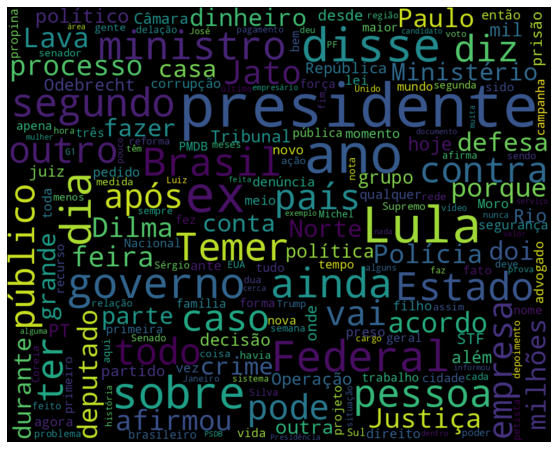

In [5]:
plot_cloud(' '.join([x for x in df['words_str']]))

#### Lemmas

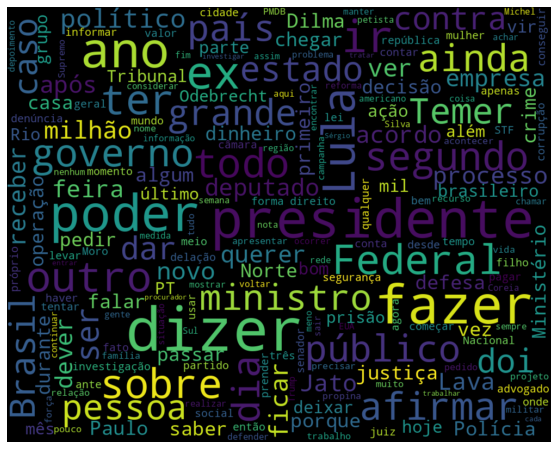

In [6]:
plot_cloud(' '.join([x for x in df['lemmas_str']]))

### Contagem de palavras

#### Palavras

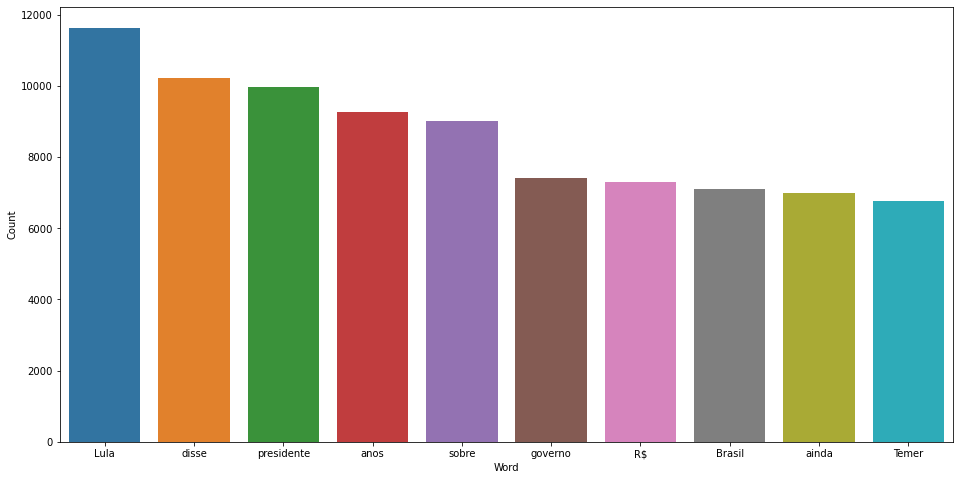

In [7]:
token_list = list([a for b in df.words.tolist() for a in b])
plot_word_counts(token_list, n=10)

#### Lemmas

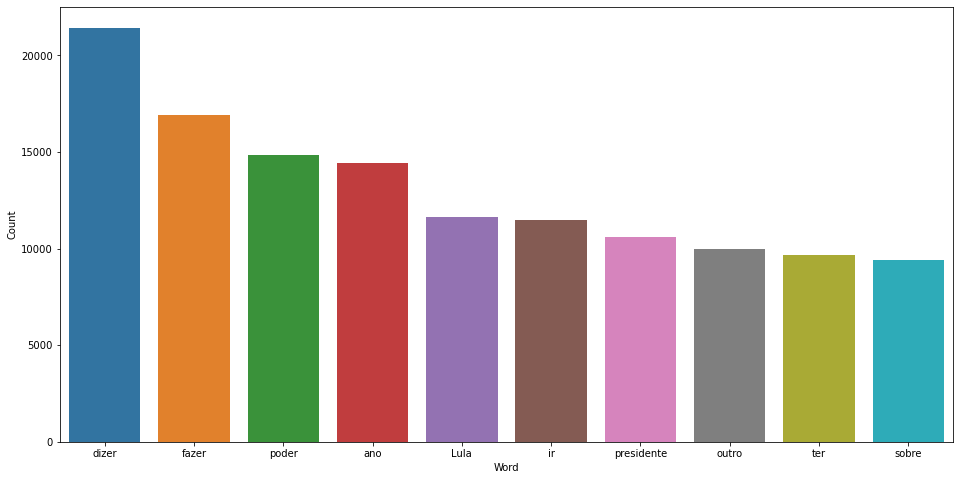

In [8]:
token_list = list([a for b in df.lemmas.tolist() for a in b])
plot_word_counts(token_list, n=10)

## Tamanhos médios de senteças e palavras

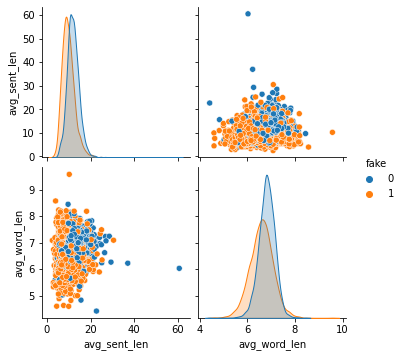

In [9]:
sns.pairplot(df, hue='fake')

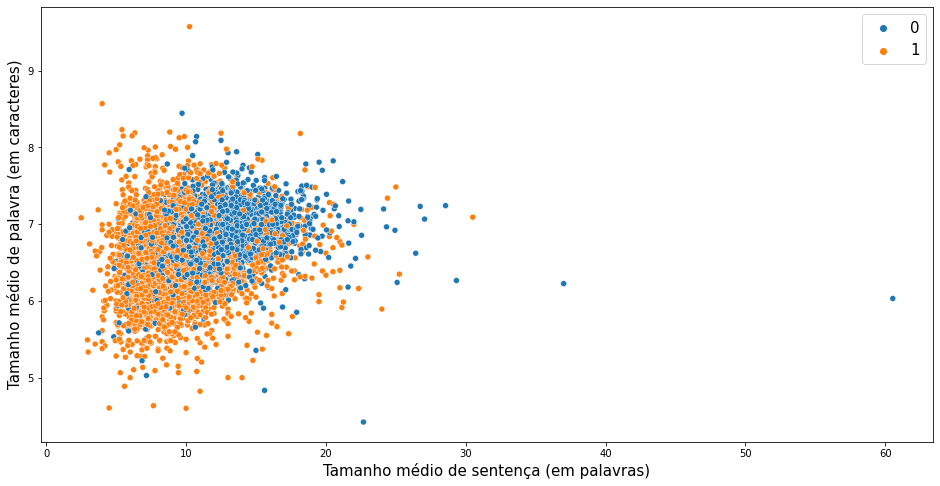

In [10]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x=df['avg_sent_len'], y=df['avg_word_len'], hue=df['fake'])
ax.legend(fontsize=15)
ax.set_ylabel("Tamanho médio de palavra (em caracteres)", fontsize=15)
ax.set_xlabel("Tamanho médio de sentença (em palavras)", fontsize=15)
plt.show()

#### Zoom para visualizar melhor sem outliers

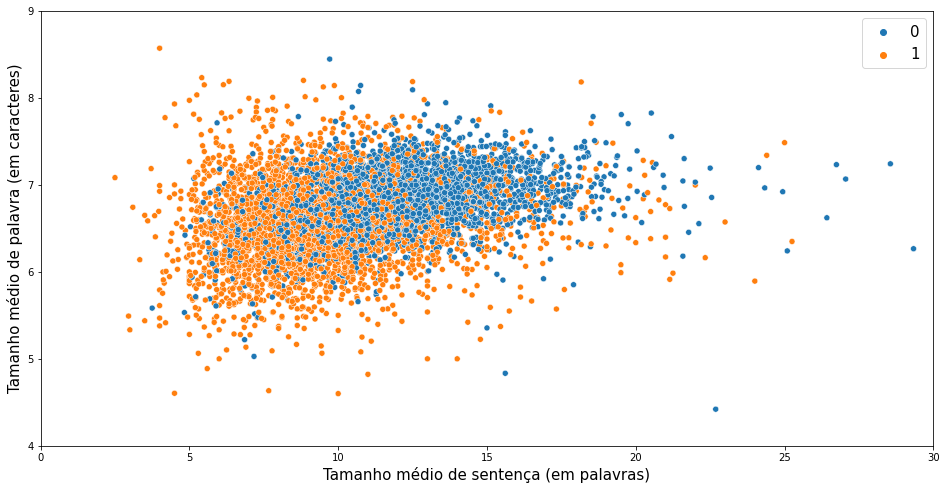

In [11]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x=df['avg_sent_len'], y=df['avg_word_len'], hue=df['fake'])
ax.set(xlim=(0, 30))
ax.set(ylim=(4,9))
ax.legend(fontsize=15)
ax.set_ylabel("Tamanho médio de palavra (em caracteres)", fontsize=15)
ax.set_xlabel("Tamanho médio de sentença (em palavras)", fontsize=15)

plt.show()

## Dataset 2: FakeRecogna

In [29]:
df_recogna = load_df_from_bucket('dados_processados_recogna.csv', tipo='processado')
df_recogna.head()

,Categoria,lemmas_str,fake
0,entretenimento,apagão vaticano papar presar acusação tráfico ...,1
1,saúde,governar equador anunciar preparar cova coleti...,0
2,saúde,companhia air france operar voar direto pequim...,0
3,saúde,marfrig global foods retomar vender carnar bov...,0
4,entretenimento,assunto voltar compartilhar rede social julho ...,1


### Nuvem de palavras
Neste dataset, as notícias já são apresentadas na forma lematizada. Então apenas a nuvem de lemas é apresentada.

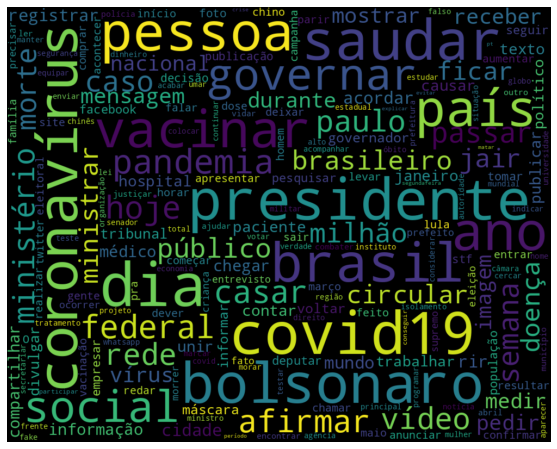

In [30]:
plot_cloud(' '.join([x for x in df_recogna['lemmas_str']]))

### Contagem de palavras

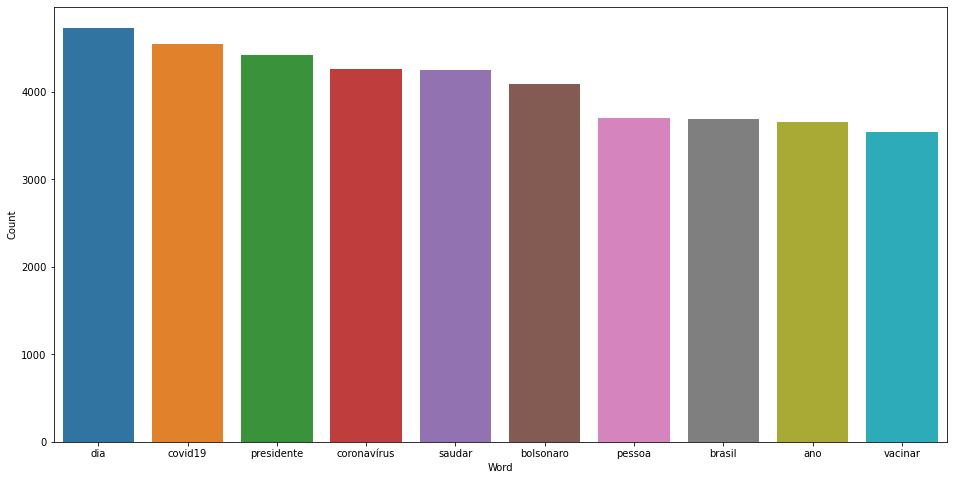

In [32]:
token_list = list([a for b in df_recogna['lemmas_str'].str.split(' ').tolist() for a in b])
plot_word_counts(token_list, n=10)

## Dataset 3: Dataset combinado

In [5]:
df_combined = load_df_from_bucket('dados_processados_combinados.csv', tipo='processado')
df_combined.head()

,fake,lemmas_str
0,0,divisão STF meio partidário independente ficar...
1,1,general mandar recado STF abaixar calça congre...
2,1,nordeste acordar Lula PT enxotar chegar bandei...
3,0,dois relatório Polícia Federal análise materia...
4,1,Coreia Norte declarar status QUASE-GUERRA mobi...


### Nuvem de palavras
Apenas notícias na forma lematizada foram salvas no DataFrame combinado, para compatibilidade com o dataseet FakeRecogna. Então apenas a nuvem de lemas é apresentada.

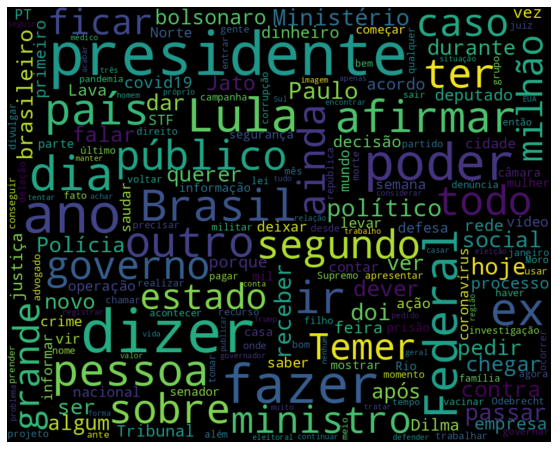

In [6]:
plot_cloud(' '.join([x for x in df_combined['lemmas_str']]))

### Contagem de palavras

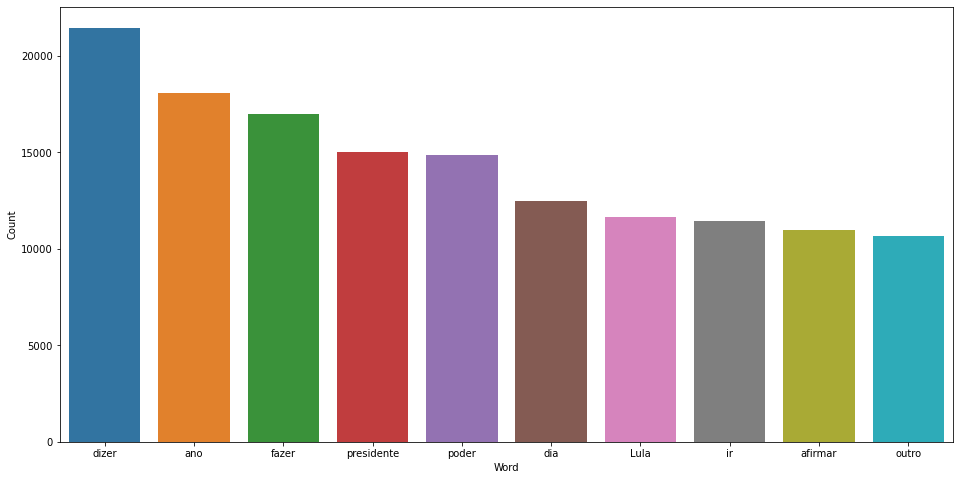

In [7]:
token_list = list([a for b in df_combined['lemmas_str'].str.split(' ').tolist() for a in b])
plot_word_counts(token_list, n=10)